# Implementing Batch Gradient Descent with early stopping for Softmax Regression By Hand

In [122]:
%pip install numpy
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [94]:
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
iris = datasets.load_iris()

X_all = iris["data"]
y_all = iris["target"]

perm = np.random.permutation(len(X_all))
print(perm)

X_shuffled = X_all[perm]
y_shuffled = y_all[perm]

X = X_shuffled[:-20]
yOrig = y_shuffled[:-20]

X_test = X_shuffled[-20:]
yOrig_test = y_shuffled[-20:]

enc = LabelBinarizer()
y = enc.fit_transform(yOrig)
y_test = enc.transform(yOrig_test)

[127  52  79 145   4  63  58 140 132 133  68  75  18  81  80  41 119 118
 149 128  55  77  45  94  61  50  49  44 136  17  95   6  91 122  96  88
  47  33  21 111 124  67  12 143  99  27 137  11 135 115   3  29 147 108
   0 103 113  86  76   7 102  30  62  38  24 110  90  23 138  84 116 125
  13 104  22 105 100  54   1  69  74 146  32  93   8  16 142  20  59  43
  25 141 121  72 130  73  14  28  46  71 144 107  36 131  37  34   5  98
  97  48  64  82   9 112 106  85 139   2  10  65  92  39  66 129 114 148
  51  15  19  70 134  89  78  87  53  57 126 109  83 123  60  35 120  26
  40  42  56 117 101  31]


In [95]:
BATCH_SIZE = 10
FEATURES = len(X[0])
CLASSES = len(y[0])

assert len(X) % BATCH_SIZE == 0

In [96]:
del_params = np.random.rand(CLASSES, FEATURES)
print(del_params, del_params[2, :])

delt = np.array([-10, -10, -10, -10])
del_params[0] += delt
print(del_params)

[[0.888526   0.7802169  0.69652948 0.32704356]
 [0.91293037 0.53978271 0.36191499 0.14868793]
 [0.28994045 0.47132888 0.48669814 0.78270095]] [0.28994045 0.47132888 0.48669814 0.78270095]
[[-9.111474   -9.2197831  -9.30347052 -9.67295644]
 [ 0.91293037  0.53978271  0.36191499  0.14868793]
 [ 0.28994045  0.47132888  0.48669814  0.78270095]]


In [97]:
def get_cross_entropy_loss(params_in, X_in, y_in):
    res = 0
    for xi, yi in zip(X_in, y_in):
        si = params_in.dot(np.transpose(xi))
        esi = np.exp(si)
        phi = esi / np.sum(esi)
        for k in range(CLASSES):
            res += yi[k] * np.log(phi[k])
    return - (res / len(X_in))

Running Epoch 0: ||||||||||||| : train_loss=0.69 test_loss=0.77
Running Epoch 1: ||||||||||||| : train_loss=0.65 test_loss=0.75
Running Epoch 2: ||||||||||||| : train_loss=0.55 test_loss=0.63
Running Epoch 3: ||||||||||||| : train_loss=0.53 test_loss=0.60
Running Epoch 4: ||||||||||||| : train_loss=0.49 test_loss=0.57
Running Epoch 5: ||||||||||||| : train_loss=0.52 test_loss=0.58
Running Epoch 6: ||||||||||||| : train_loss=0.47 test_loss=0.55
Running Epoch 7: ||||||||||||| : train_loss=0.65 test_loss=0.82
Running Epoch 8: ||||||||||||| : train_loss=0.43 test_loss=0.54
Running Epoch 9: ||||||||||||| : train_loss=0.52 test_loss=0.66
Running Epoch 10: ||||||||||||| : train_loss=0.39 test_loss=0.49
Running Epoch 11: ||||||||||||| : train_loss=0.38 test_loss=0.47
Running Epoch 12: ||||||||||||| : train_loss=0.37 test_loss=0.46
Running Epoch 13: ||||||||||||| : train_loss=0.36 test_loss=0.47
Running Epoch 14: ||||||||||||| : train_loss=0.35 test_loss=0.45
Running Epoch 15: ||||||||||||| : t

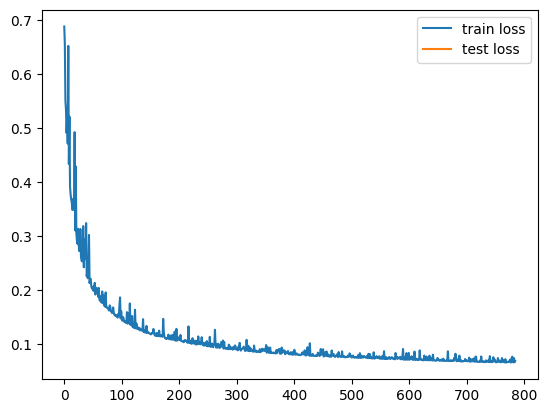

In [123]:
all_idxes = np.arange(0, len(X))
np.random.shuffle(all_idxes)

train_errs = []
test_errs = []

params = np.random.rand(CLASSES, FEATURES)
best_params = params.copy()
learning_rate = 0.05
min_loss = float('inf')
steps_since_last_min = 0
for epoch in range(1000):
    np.random.shuffle(all_idxes)
    print(f"Running Epoch {epoch}: ", end="")
    for batch in range(len(X) // BATCH_SIZE):
        del_params = np.random.rand(CLASSES, FEATURES)
        for i in range(batch * BATCH_SIZE, (batch + 1) * BATCH_SIZE):
            idx = all_idxes[i]
            xi = X[idx]
            yi = y[idx]
            si = params.dot(np.transpose(xi))
            esi = np.exp(si)
            phi = esi / np.sum(esi)

            for k in range(CLASSES):
                del_params[k] += (phi[k] - yi[k]) * xi
        params -= learning_rate * (del_params / BATCH_SIZE)
        print("|", end="")
    train_loss = get_cross_entropy_loss(params, X, y)
    test_loss = get_cross_entropy_loss(params, X_test, y_test)
    
    train_errs.append(train_loss)
    test_errs.append(test_loss)
    
    print(f" : train_loss={train_loss:.2f} test_loss={test_loss:.2f}")
    
    if train_loss < min_loss:
        min_loss = train_loss
        steps_since_last_min = 0
        best_params = params.copy()
    else:
        steps_since_last_min += 1
        
    if steps_since_last_min > 15:
        break
        
plt.plot(train_errs)
plt.plot(test_loss)
plt.legend(['train loss', 'test loss'])

# Run on some test examples

In [119]:
for xi, yi in zip(X_test, y_test):
    si = best_params.dot(np.transpose(xi))
    predicted = np.argmax(si)
    print('✅' if np.argmax(si) == np.argmax(yi) else '❌', predicted, np.argmax(yi))

✅ 2 2
✅ 1 1
✅ 1 1
✅ 1 1
✅ 1 1
✅ 1 1
✅ 2 2
✅ 2 2
❌ 2 1
✅ 2 2
✅ 1 1
✅ 0 0
✅ 2 2
✅ 0 0
✅ 0 0
✅ 0 0
✅ 1 1
✅ 2 2
✅ 2 2
✅ 0 0
